In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
# Load the dataset
data = pd.read_csv('stocks.csv')
data

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000
...,...,...,...,...,...,...,...,...
243,GOOG,2023-05-01,107.720001,108.680000,107.500000,107.709999,107.709999,20926300
244,GOOG,2023-05-02,107.660004,107.730003,104.500000,105.980003,105.980003,20343100
245,GOOG,2023-05-03,106.220001,108.129997,105.620003,106.120003,106.120003,17116300
246,GOOG,2023-05-04,106.160004,106.300003,104.699997,105.209999,105.209999,19780600


In [13]:
# Display the first few rows of the dataset
print(data.head())

  Ticker        Date        Open        High         Low       Close  \
0   AAPL  2023-02-07  150.639999  155.229996  150.639999  154.649994   
1   AAPL  2023-02-08  153.880005  154.580002  151.169998  151.919998   
2   AAPL  2023-02-09  153.779999  154.330002  150.419998  150.869995   
3   AAPL  2023-02-10  149.460007  151.339996  149.220001  151.009995   
4   AAPL  2023-02-13  150.949997  154.259995  150.919998  153.850006   

    Adj Close    Volume  
0  154.414230  83322600  
1  151.688400  64120100  
2  150.639999  56007100  
3  151.009995  57450700  
4  153.850006  62199000  


In [14]:
data.columns

Index(['Ticker', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close',
       'Volume'],
      dtype='object')

In [18]:
# Check formissing values
print(data.isnull().sum())

Ticker       0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


Data Preparation

In [15]:
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     248 non-null    object 
 1   Date       248 non-null    object 
 2   Open       248 non-null    float64
 3   High       248 non-null    float64
 4   Low        248 non-null    float64
 5   Close      248 non-null    float64
 6   Adj Close  248 non-null    float64
 7   Volume     248 non-null    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 15.6+ KB
None
  Ticker        Date        Open        High         Low       Close  \
0   AAPL  2023-02-07  150.639999  155.229996  150.639999  154.649994   
1   AAPL  2023-02-08  153.880005  154.580002  151.169998  151.919998   
2   AAPL  2023-02-09  153.779999  154.330002  150.419998  150.869995   
3   AAPL  2023-02-10  149.460007  151.339996  149.220001  151.009995   
4   AAPL  2023-02-13  150.949997  154.259995  150.919998  153.850006

In [16]:
print(data.describe())


             Open        High         Low       Close   Adj Close  \
count  248.000000  248.000000  248.000000  248.000000  248.000000   
mean   215.252093  217.919662  212.697452  215.381674  215.362697   
std     91.691315   92.863023   90.147881   91.461989   91.454750   
min     89.540001   90.129997   88.860001   89.349998   89.349998   
25%    135.235004  137.440004  134.822495  136.347498  136.347498   
50%    208.764999  212.614998  208.184998  209.920006  209.920006   
75%    304.177505  307.565002  295.437500  303.942505  303.942505   
max    372.410004  373.829987  361.739990  366.829987  366.829987   

             Volume  
count  2.480000e+02  
mean   3.208210e+07  
std    2.233590e+07  
min    2.657900e+06  
25%    1.714180e+07  
50%    2.734000e+07  
75%    4.771772e+07  
max    1.133164e+08  


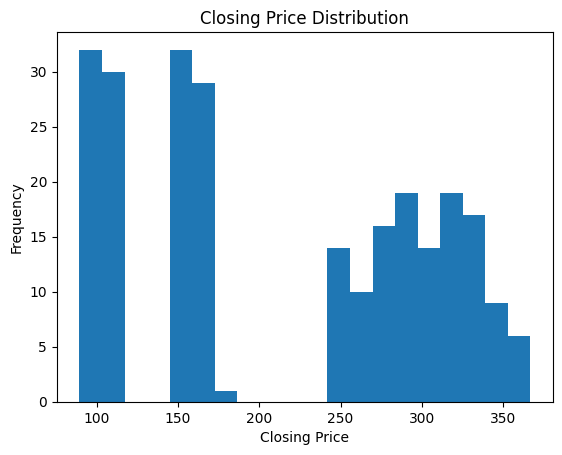

In [ ]:
plt.hist(data['Close'], bins=20)
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.title('Closing Price Distribution')
plt.show()


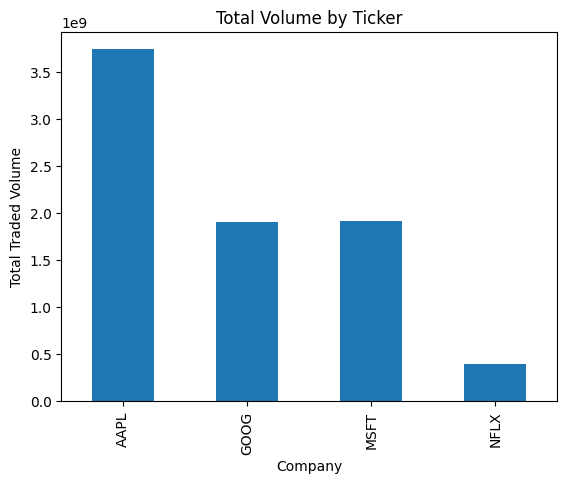

In [19]:
ticker_volume = data.groupby('Ticker')['Volume'].sum()
ticker_volume.plot(kind='bar')
plt.title('Total Volume by Ticker')
plt.xlabel('Company')
plt.ylabel('Total Traded Volume')
plt.show()


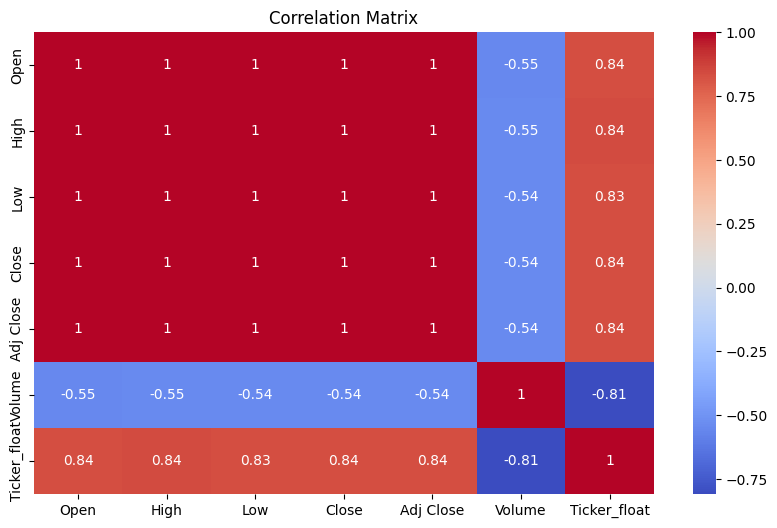

In [24]:
# Correlation Matrix (fix)
numeric_data = data.select_dtypes(include='number')  # Automatically selects only numeric columns
correlation_matrix = numeric_data.corr()


plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


Auxiliary Analysis -supporting or supplemental insights, 
1. Seasonality & Temporal Trends - Detect if certain days are systematically bullish or bearish (e.g., “Monday Effect”).
2. Stock Volatility Comparison - Measure and compare volatility across stocks.
3. Rolling Correlation Between Pairs - Measure how correlation between two stocks changes over time. (Dynamic correlation gives more actionable information than static one.)
4. Return Analysis - Cumulative returns show the overall growth trajectory of each stock.(Identify the best performing stock over time)
5.  Volume Spike Detection - Highlight days with unusual volume activity.(Large spikes in volume often precede or follow price movements.)
6. Technical Indicators - indicators like RSI, MACD, or Bollinger Bands.(Helps detect overbought/oversold conditions.)

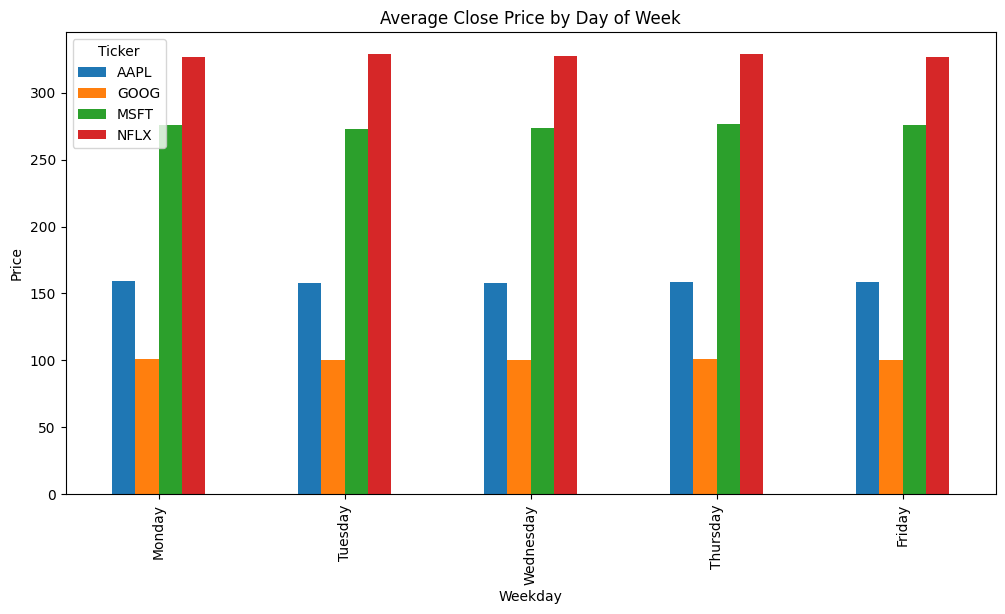

In [34]:
data['Date'] = pd.to_datetime(data['Date'])
data['Weekday'] = data['Date'].dt.day_name()

# Average close price by weekday
weekday_avg = data.groupby(['Ticker', 'Weekday'])['Close'].mean().unstack()
weekday_avg = weekday_avg[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']]
weekday_avg.T.plot(kind='bar', figsize=(12, 6))
plt.title("Average Close Price by Day of Week")
plt.ylabel("Price")
plt.show()


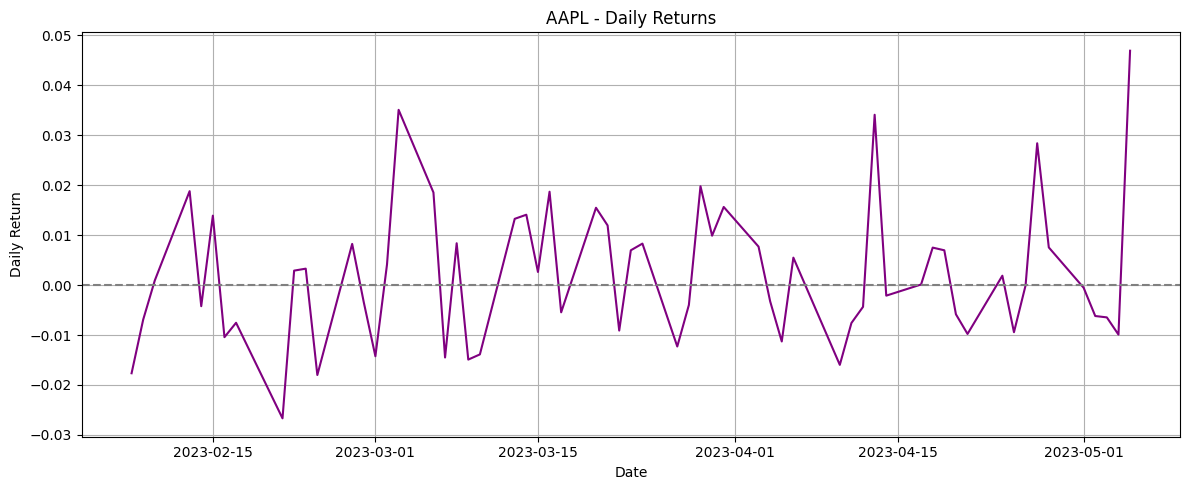

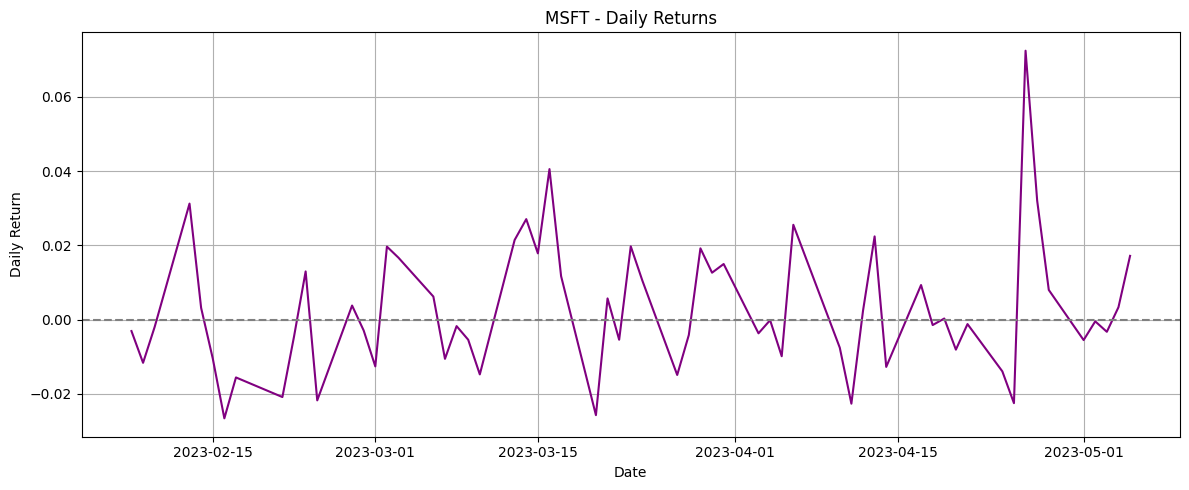

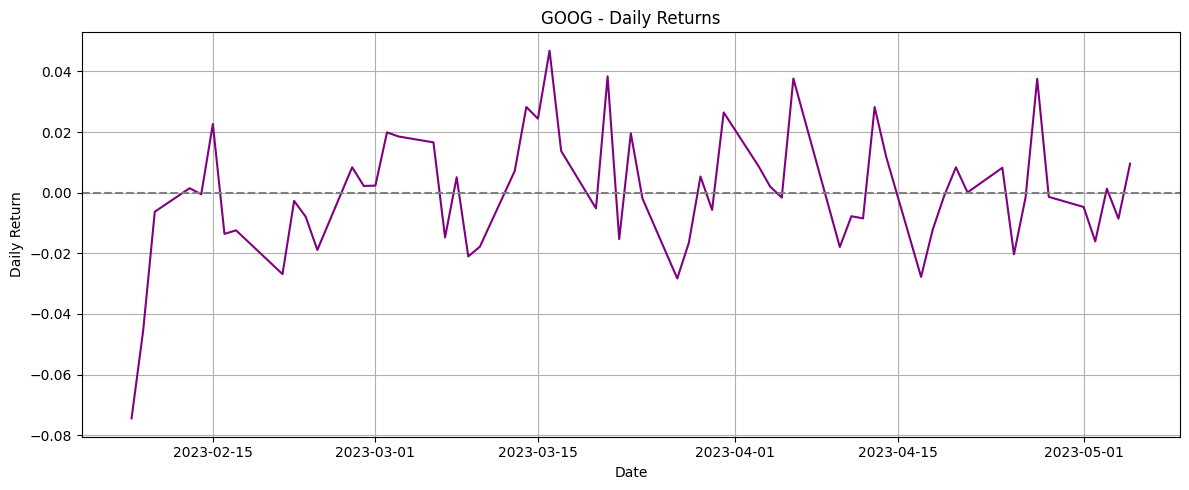

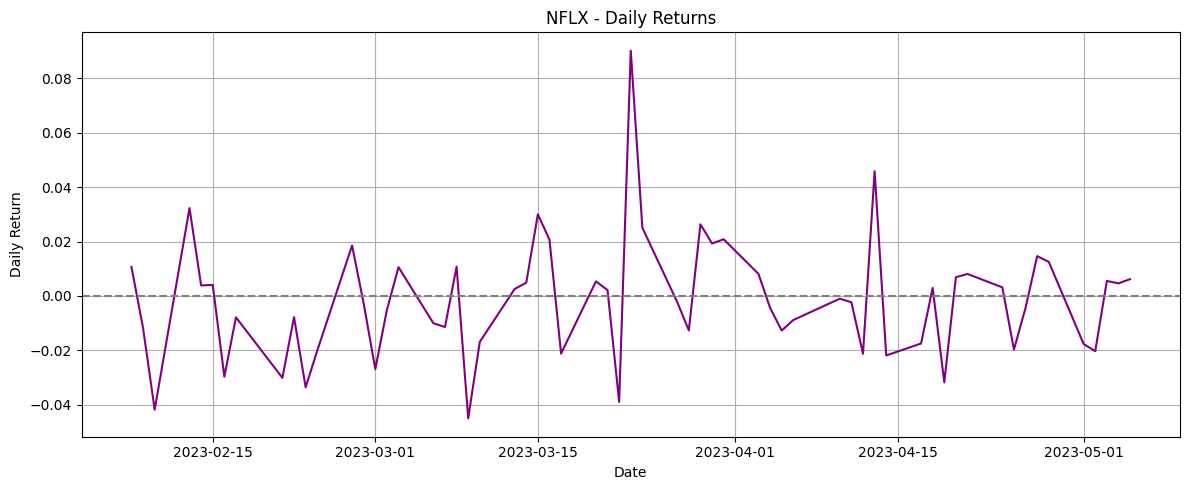

📊 Annualized Volatility by Ticker:
AAPL: 22.47%
MSFT: 28.38%
GOOG: 32.88%
NFLX: 35.69%


In [35]:
# Higher volatility = riskier stock. Do this for all tickers for comparison.

tickers = data['Ticker'].unique()

volatility_results = {}

# Loop through each ticker
for ticker in tickers:
    ticker_data = data[data['Ticker'] == ticker].sort_values('Date')
    
    # Calculate daily return
    ticker_data['Daily_Return'] = ticker_data['Close'].pct_change()
    
    # Calculate volatility (standard deviation of returns)
    daily_volatility = ticker_data['Daily_Return'].std()
    annualized_volatility = daily_volatility * (252 ** 0.5)  # Approx. 252 trading days/year

    volatility_results[ticker] = annualized_volatility

    # Plot daily returns
    plt.figure(figsize=(12, 5))
    plt.plot(ticker_data['Date'], ticker_data['Daily_Return'], label='Daily Return', color='purple')
    plt.axhline(0, color='gray', linestyle='--')
    plt.title(f'{ticker} - Daily Returns')
    plt.xlabel('Date')
    plt.ylabel('Daily Return')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Display summary
print("📊 Annualized Volatility by Ticker:")
for ticker, vol in volatility_results.items():
    print(f"{ticker}: {vol:.2%}")

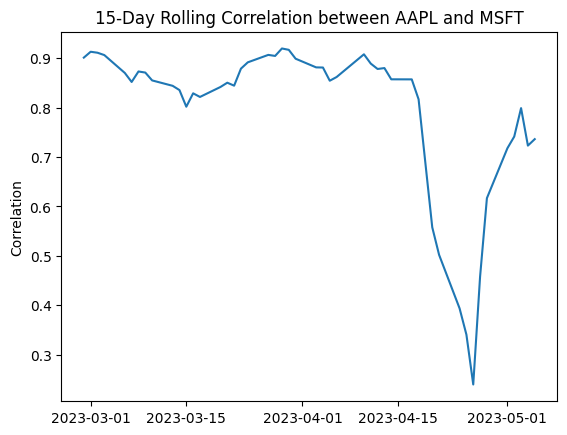

In [36]:
close_prices = data.pivot(index='Date', columns='Ticker', values='Close')
rolling_corr = close_prices['AAPL'].rolling(window=15).corr(close_prices['MSFT'])

plt.plot(rolling_corr)
plt.title("15-Day Rolling Correlation between AAPL and MSFT")
plt.ylabel("Correlation")
plt.show()


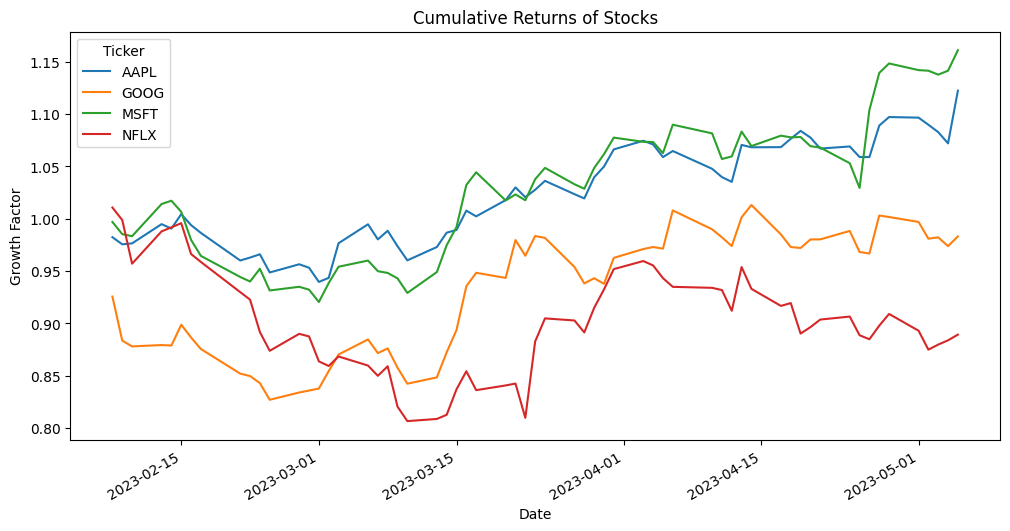

In [37]:
returns = close_prices.pct_change()
cumulative_returns = (1 + returns).cumprod()

cumulative_returns.plot(figsize=(12, 6))
plt.title("Cumulative Returns of Stocks")
plt.ylabel("Growth Factor")
plt.show()


In [38]:
data['Volume_zscore'] = (data['Volume'] - data['Volume'].mean()) / data['Volume'].std()
spike_days = data[data['Volume_zscore'] > 2]

print(spike_days[['Date', 'Ticker', 'Volume', 'Volume_zscore']])


          Date Ticker     Volume  Volume_zscore
0   2023-02-07   AAPL   83322600       2.294087
188 2023-02-09   GOOG   97798600       2.942192
18  2023-03-06   AAPL   87558000       2.483710
23  2023-03-13   AAPL   84457100       2.344880
25  2023-03-15   AAPL   77167900       2.018535
27  2023-03-17   AAPL   98944600       2.993499
60  2023-05-04   AAPL   81235400       2.200641
61  2023-05-05   AAPL  113316400       3.636939


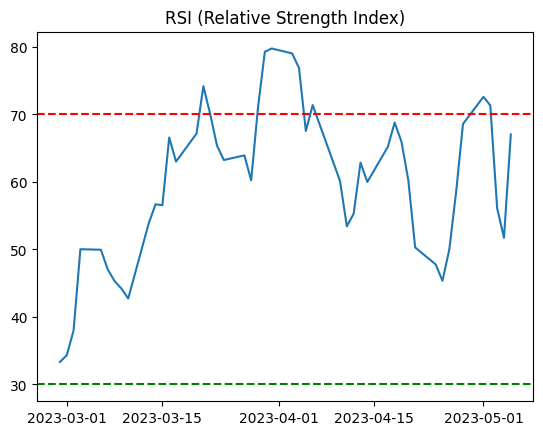

In [39]:
# Example: 14-day RSI
delta = aapl_data['Close'].diff()
gain = delta.clip(lower=0)
loss = -delta.clip(upper=0)

avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()

rs = avg_gain / avg_loss
rsi = 100 - (100 / (1 + rs))

plt.plot(rsi)
plt.axhline(70, color='r', linestyle='--')
plt.axhline(30, color='g', linestyle='--')
plt.title("RSI (Relative Strength Index)")
plt.show()


Time Series Analysis & Moving Averages

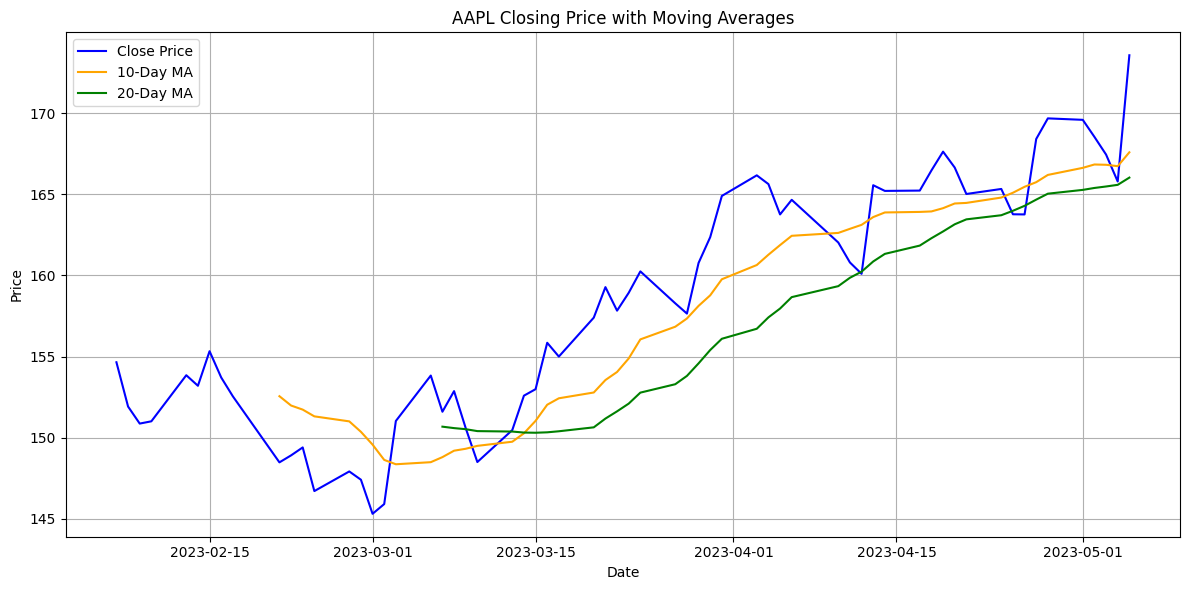

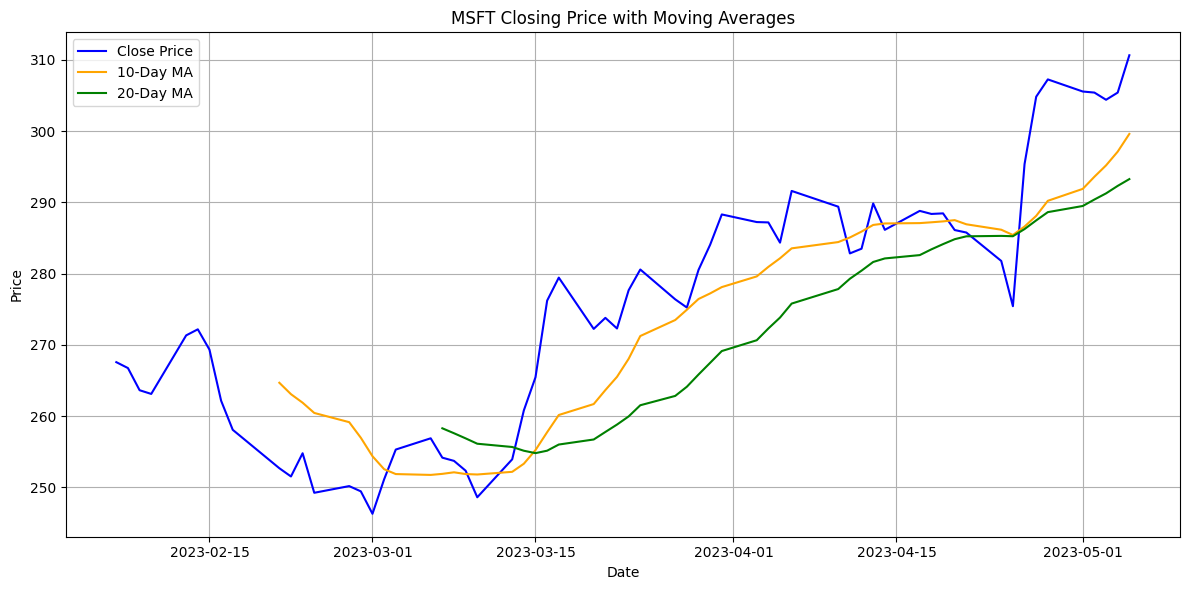

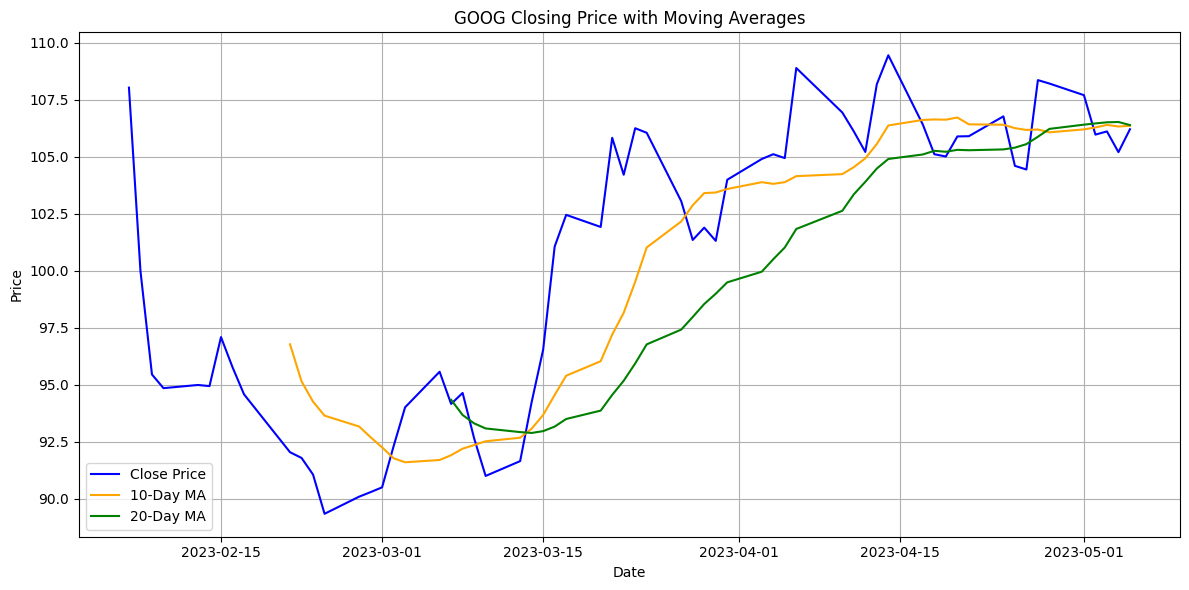

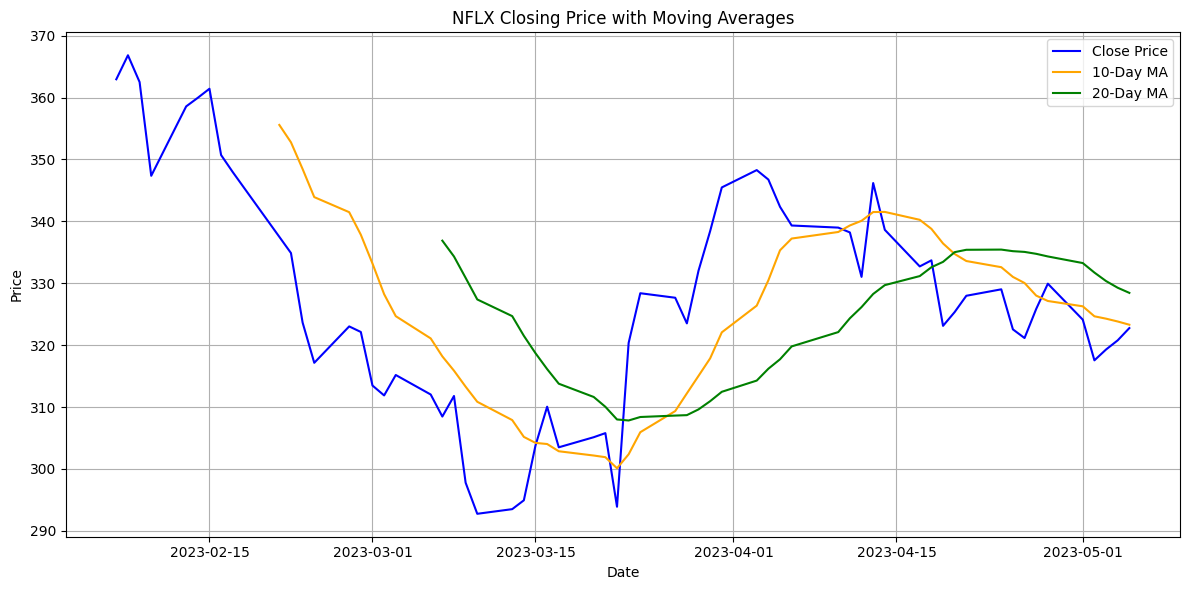

In [ ]:


data['Date'] = pd.to_datetime(data['Date'])
tickers = data['Ticker'].unique()

# Time series & moving averages for each ticker
for ticker in tickers:
    ticker_data = data[data['Ticker'] == ticker].sort_values('Date')
    
    # Calculate moving averages
    ticker_data['MA_10'] = ticker_data['Close'].rolling(window=10).mean()
    ticker_data['MA_20'] = ticker_data['Close'].rolling(window=20).mean()
    
    # Plot
    plt.figure(figsize=(12, 6))
    plt.plot(ticker_data['Date'], ticker_data['Close'], label='Close Price', color='blue')
    plt.plot(ticker_data['Date'], ticker_data['MA_10'], label='10-Day MA', color='orange')
    plt.plot(ticker_data['Date'], ticker_data['MA_20'], label='20-Day MA', color='green')
    
    plt.title(f'{ticker} Closing Price with Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Identifies short-term trend smoothing.

Correlation between stocks

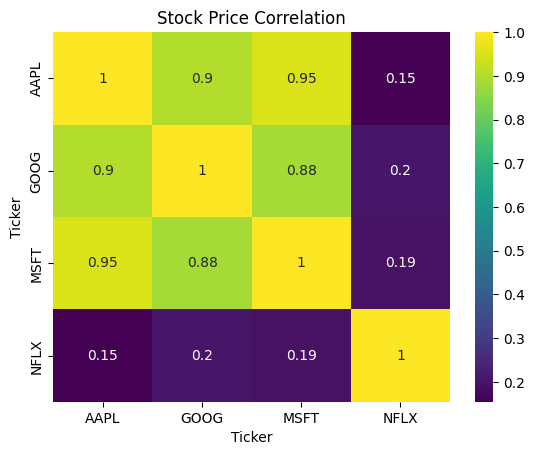

In [ ]:
# Pivot to create a matrix of closing prices
close_prices = data.pivot(index='Date', columns='Ticker', values='Close')
sns.heatmap(close_prices.corr(), annot=True, cmap='viridis')
plt.title("Stock Price Correlation")
plt.show()

#Helps understand how these stocks move together (diversification potential).

ML - Linear Regression

In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Data prep
features = ['Open', 'High', 'Low', 'Volume']
X = data[features]
y = data['Close']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize model
model = LinearRegression()

# Cross-validation on training data
r2_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
print(f"Cross-Validated R² on training set: {r2_scores.mean():.2f}")

# Train on full training set and evaluate on test set
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
print(f"Test Set MSE: {mse:.2f}")
print(f"Test Set RMSE: {np.sqrt(mse):.2f}")
print(f"Test Set R²: {r2_score(y_test, y_pred):.2f}")


Cross-Validated R² on training set: 1.00
Test Set MSE: 2.89
Test Set RMSE: 1.70
Test Set R²: 1.00


In [43]:
import pickle

# Save the trained model and scaler using pickle
with open('stock_price_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

# Save scaler
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

print("✅ Model and scaler saved using pickle.")

✅ Model and scaler saved using pickle.
